# importer les bibiothèques à utiliser 


In [61]:
import pandas as pd #pour importer les tables excels 
import numpy as np # manipuler les matrices
import matplotlib.pyplot as plt #visualiser les données 
%matplotlib inline
import seaborn as sns #(basée en matplotlib) interfaces de haut niv 
from mpl_toolkits.mplot3d import Axes3D
import os #fonction pour interagir avec SE 


# imprter le data set 


In [62]:
df  =pd.read_excel('E:\\splited_for_DL\\all.xlsx',sheet_name='X') # lire le tableau dans le fichier excel et le mettre dans un bloc de donnée
df #afficher 

,TIME,X_ACC,Y_ACC,Z_ACC,A,activité
0,0,2082,2165,1702,3452.354704,1
1,1,2077,2160,1703,3446.699581,1
2,2,2082,2168,1704,3455.222714,1
3,3,2083,2159,1703,3449.692595,1
4,4,2085,2162,1706,3454.258965,1
...,...,...,...,...,...,...
59275,983,2050,2351,2081,3749.701588,6
59276,984,2058,2359,2129,3785.879818,6
59277,985,2055,2331,2103,3752.225340,6
59278,986,2052,2337,2090,3747.048572,6


In [63]:
dff= pd.DataFrame()
dff =df
dff


,TIME,X_ACC,Y_ACC,Z_ACC,A,activité
0,0,2082,2165,1702,3452.354704,1
1,1,2077,2160,1703,3446.699581,1
2,2,2082,2168,1704,3455.222714,1
3,3,2083,2159,1703,3449.692595,1
4,4,2085,2162,1706,3454.258965,1
...,...,...,...,...,...,...
59275,983,2050,2351,2081,3749.701588,6
59276,984,2058,2359,2129,3785.879818,6
59277,985,2055,2331,2103,3752.225340,6
59278,986,2052,2337,2090,3747.048572,6


# La standarisation des données 


In [64]:
X = dff[['X_ACC', 'Y_ACC', 'Z_ACC', 'A']] #définir feautures qu'on veut les standariser


In [65]:
from sklearn.preprocessing import StandardScaler #importer l'outil de standarisation
scaler = StandardScaler()
X = scaler.fit_transform(X)

scaled_X = pd.DataFrame(data = X, columns = ['X_ACC', 'Y_ACC', 'Z_ACC', 'A'])


In [66]:
#ajouter les autres feautures au data frame
scaled_X['time'] = dff['TIME']

scaled_X['activity'] = dff['activité']
scaled_X

,X_ACC,Y_ACC,Z_ACC,A,time,activity
0,1.020610,-1.621050,-2.478599,-1.493703,0,1
1,0.974021,-1.662001,-2.469368,-1.534906,1,1
2,1.020610,-1.596480,-2.460138,-1.472807,2,1
3,1.029928,-1.670191,-2.469368,-1.513099,3,1
4,1.048563,-1.645621,-2.441677,-1.479829,4,1
...,...,...,...,...,...,...
59275,0.722440,-0.097684,1.019799,0.672759,983,6
59276,0.796982,-0.032162,1.462868,0.936353,984,6
59277,0.769029,-0.261487,1.222873,0.691147,985,6
59278,0.741075,-0.212346,1.102875,0.653429,986,6


###### changer le tableau de 2 dimension à 3

In [68]:
import scipy.stats as stats
Fs = 20
frame_size = Fs*4 # 80
hop_size = Fs*2 # 40

In [69]:
def get_frames(df, frame_size, hop_size):

    N_FEATURES =5 

    frames = []
    labels = []
    for i in range(0, len(df) - frame_size, hop_size):
        x = df['X_ACC'].values[i: i + frame_size]
        y = df['Y_ACC'].values[i: i + frame_size]
        z = df['Z_ACC'].values[i: i + frame_size]
        a = df['A'].values[i: i + frame_size]
        t = df['time'].values[i: i + frame_size]

        # Récupérer le libellé le plus souvent utilisé dans ce segment
        label = stats.mode(df['activity'][i: i + frame_size])[0][0]
        frames.append([x, y, z, a, t])
        labels.append(label)

    # Amener les segments dans une meilleure forme
    frames = np.asarray(frames).reshape(-1, frame_size, N_FEATURES)
    labels = np.asarray(labels)

    return frames, labels
scaled_X

,X_ACC,Y_ACC,Z_ACC,A,time,activity
0,1.020610,-1.621050,-2.478599,-1.493703,0,1
1,0.974021,-1.662001,-2.469368,-1.534906,1,1
2,1.020610,-1.596480,-2.460138,-1.472807,2,1
3,1.029928,-1.670191,-2.469368,-1.513099,3,1
4,1.048563,-1.645621,-2.441677,-1.479829,4,1
...,...,...,...,...,...,...
59275,0.722440,-0.097684,1.019799,0.672759,983,6
59276,0.796982,-0.032162,1.462868,0.936353,984,6
59277,0.769029,-0.261487,1.222873,0.691147,985,6
59278,0.741075,-0.212346,1.102875,0.653429,986,6


In [70]:
X, y = get_frames(scaled_X, frame_size, hop_size)


In [71]:
X.shape 

(1480, 80, 5)

# diviser data set en train et test sets 

In [72]:
from sklearn.model_selection import train_test_split # import la fonction necessaire
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)


In [73]:
X_train.shape, X_test.shape


((1184, 80, 5), (296, 80, 5))

In [74]:
X_train = X_train.reshape(1184, 80, 5, 1)
X_test = X_test.reshape(296, 80, 5, 1)


In [75]:
X_train[0].shape, X_test[0].shape


((80, 5, 1), (80, 5, 1))

# DEFINIR ET IMPLEMENTER LE MODELE DE CNN

La couche de sortie doit utiliser la fonction softmax car il s'agit d'un problème de classification multiclasse

In [76]:
#importer le bibiothèque contenant les fonctions des réseaux de neurones
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
print(tf.__version__)

2.6.0


###### Creer le modèle 

on définit un RN ,ajuste et prédit l'ensemble de données de test pour voir les performances

In [85]:
model = Sequential()
#adding convolution layer1

model.add(Conv2D(32, (2, 2), activation = 'relu', input_shape = X_train[0].shape))
#adding pooling layer
model.add(MaxPool2D(2,2))


          
#adding fully connected layer
model.add(Flatten())

model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.5))


#adding output layer

model.add(Dense(7, activation='softmax'))


In [56]:

model = Sequential()
model.add(Conv2D(100, (2, 2), activation = 'relu', input_shape = X_train[0].shape))
model.add(Conv2D(100, (2, 2), activation = 'relu', input_shape = X_train[0].shape))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))


# Le modèle 1

accur 70 

In [94]:
model = Sequential()
model.add(Conv2D(100, (2, 2), activation = 'relu', input_shape = X_train[0].shape))
model.add(Dropout(0.1))
#adding pooling layer
model.add(MaxPool2D(2,2))
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))

    

compiler le modèle 

In [95]:
model.compile(optimizer=Adam(learning_rate = 0.001), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])


### entrainer 

In [98]:
history = model.fit(X_train, y_train, epochs = 20, validation_data= (X_test, y_test), verbose=0)
#history=model.fit(X_train, y_train, batch_size=100, epochs=50, validation_data=(X_test, y_test))

###### visualiser accuracy 

In [49]:
def plot_learningCurve(history, epochs):
  # Plot training & validation accuracy values
  epoch_range = range(1, epochs+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

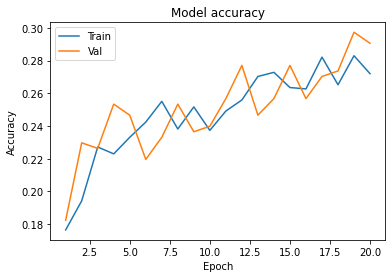

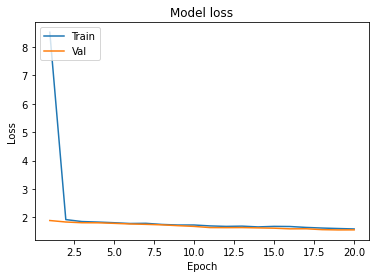

In [84]:
plot_learningCurve(history, 20)


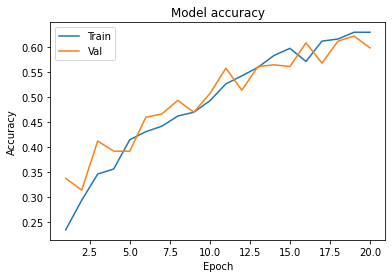

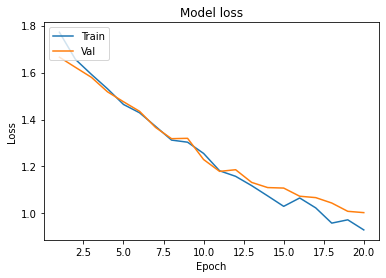

In [240]:
plot_learningCurve(history, 20)


In [279]:
history = model.fit(X_train, y_train, epochs = 200, validation_data= (X_test, y_test), verbose=1)
#history=model.fit(X_train, y_train, batch_size=100, epochs=50, validation_data=(X_test, y_test))

Epoch 1/200
37/37 [==============================] - 2s 34ms/step - loss: 1.8018 - accuracy: 0.2188 - val_loss: 1.6931 - val_accuracy: 0.2939
Epoch 2/200
37/37 [==============================] - 1s 34ms/step - loss: 1.6728 - accuracy: 0.2872 - val_loss: 1.6094 - val_accuracy: 0.3243
Epoch 3/200
37/37 [==============================] - 1s 40ms/step - loss: 1.6055 - accuracy: 0.3117 - val_loss: 1.5849 - val_accuracy: 0.3176
Epoch 4/200
37/37 [==============================] - 1s 30ms/step - loss: 1.5684 - accuracy: 0.3564 - val_loss: 1.5608 - val_accuracy: 0.3581
Epoch 5/200
37/37 [==============================] - 1s 24ms/step - loss: 1.5287 - accuracy: 0.3615 - val_loss: 1.4988 - val_accuracy: 0.4088
Epoch 6/200
37/37 [==============================] - 1s 25ms/step - loss: 1.4795 - accuracy: 0.4054 - val_loss: 1.4784 - val_accuracy: 0.3851
Epoch 7/200
37/37 [==============================] - 1s 25ms/step - loss: 1.4229 - accuracy: 0.4291 - val_loss: 1.4097 - val_accuracy: 0.4358
Epoch 

37/37 [==============================] - 1s 22ms/step - loss: 0.6337 - accuracy: 0.7551 - val_loss: 0.8676 - val_accuracy: 0.6993
Epoch 59/200
37/37 [==============================] - 1s 24ms/step - loss: 0.6155 - accuracy: 0.7542 - val_loss: 0.8582 - val_accuracy: 0.6824
Epoch 60/200
37/37 [==============================] - 1s 34ms/step - loss: 0.5850 - accuracy: 0.7652 - val_loss: 0.8939 - val_accuracy: 0.6655
Epoch 61/200
37/37 [==============================] - 2s 41ms/step - loss: 0.6132 - accuracy: 0.7390 - val_loss: 0.8764 - val_accuracy: 0.6858
Epoch 62/200
37/37 [==============================] - 1s 22ms/step - loss: 0.6099 - accuracy: 0.7500 - val_loss: 0.8380 - val_accuracy: 0.6993
Epoch 63/200
37/37 [==============================] - 1s 23ms/step - loss: 0.5641 - accuracy: 0.7736 - val_loss: 0.8377 - val_accuracy: 0.6959
Epoch 64/200
37/37 [==============================] - 1s 24ms/step - loss: 0.5598 - accuracy: 0.7669 - val_loss: 0.8371 - val_accuracy: 0.7196
Epoch 65/200

Epoch 172/200
37/37 [==============================] - 1s 22ms/step - loss: 0.3396 - accuracy: 0.8699 - val_loss: 0.9643 - val_accuracy: 0.7466
Epoch 173/200
37/37 [==============================] - 1s 22ms/step - loss: 0.3625 - accuracy: 0.8556 - val_loss: 0.9973 - val_accuracy: 0.7432
Epoch 174/200
37/37 [==============================] - 1s 21ms/step - loss: 0.3368 - accuracy: 0.8682 - val_loss: 0.9716 - val_accuracy: 0.7432
Epoch 175/200
37/37 [==============================] - 1s 22ms/step - loss: 0.3413 - accuracy: 0.8606 - val_loss: 0.9794 - val_accuracy: 0.7568
Epoch 176/200
37/37 [==============================] - 1s 21ms/step - loss: 0.3434 - accuracy: 0.8708 - val_loss: 0.9188 - val_accuracy: 0.7432
Epoch 177/200
37/37 [==============================] - 1s 22ms/step - loss: 0.3597 - accuracy: 0.8547 - val_loss: 0.9943 - val_accuracy: 0.7365
Epoch 178/200
37/37 [==============================] - 1s 23ms/step - loss: 0.3598 - accuracy: 0.8505 - val_loss: 0.9524 - val_accuracy:

In [280]:
score, acc = model.evaluate(X_test, y_test,verbose=2, batch_size= 256)
print('test accuracy:', acc)

2/2 - 0s - loss: 0.9962 - accuracy: 0.7466
test accuracy: 0.7466216087341309


#### fin du modele1 


# changer le validation split 

mm model

In [81]:
model = Sequential()
model.add(Conv2D(100, (2, 2), activation = 'relu', input_shape = X_train[0].shape))
model.add(Dropout(0.1))
#ajouter pooling layer
model.add(MaxPool2D(2,2))
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))





In [264]:
model.compile(optimizer=Adam(learning_rate = 0.001), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(X_train, y_train, epochs = 50, batch_size=100, validation_split=0.2)
shuffle=True


Epoch 1/50
10/10 [==============================] - 4s 106ms/step - loss: 1.8283 - accuracy: 0.1996 - val_loss: 1.6403 - val_accuracy: 0.3629
Epoch 2/50
10/10 [==============================] - 1s 63ms/step - loss: 1.7114 - accuracy: 0.2429 - val_loss: 1.6156 - val_accuracy: 0.3376
Epoch 3/50
10/10 [==============================] - 1s 64ms/step - loss: 1.6693 - accuracy: 0.2872 - val_loss: 1.5624 - val_accuracy: 0.3755
Epoch 4/50
10/10 [==============================] - 1s 64ms/step - loss: 1.6259 - accuracy: 0.3062 - val_loss: 1.5421 - val_accuracy: 0.3291
Epoch 5/50
10/10 [==============================] - 1s 64ms/step - loss: 1.5808 - accuracy: 0.3421 - val_loss: 1.5191 - val_accuracy: 0.3671
Epoch 6/50
10/10 [==============================] - 1s 64ms/step - loss: 1.5563 - accuracy: 0.3643 - val_loss: 1.4993 - val_accuracy: 0.4177
Epoch 7/50
10/10 [==============================] - 1s 71ms/step - loss: 1.5081 - accuracy: 0.3759 - val_loss: 1.4807 - val_accuracy: 0.4008
Epoch 8/50
1

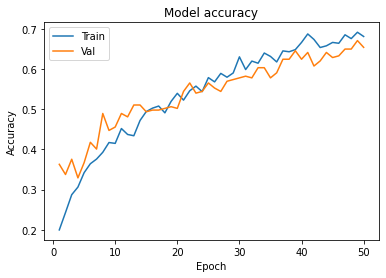

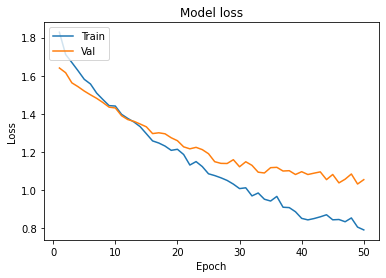

In [265]:
plot_learningCurve(history, 50)


In [266]:
score = model.evaluate(X_test, y_test, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

Test loss: 1.0336662530899048 / Test accuracy: 0.6013513803482056


###### augmenter epochs 

In [272]:
model.compile(optimizer=Adam(learning_rate = 0.001), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(X_train, y_train, epochs = 200, batch_size=100, validation_split=0.2)
shuffle=True


Epoch 1/200
10/10 [==============================] - 2s 132ms/step - loss: 1.8410 - accuracy: 0.2070 - val_loss: 1.6581 - val_accuracy: 0.2996
Epoch 2/200
10/10 [==============================] - 1s 74ms/step - loss: 1.7158 - accuracy: 0.2555 - val_loss: 1.6116 - val_accuracy: 0.3333
Epoch 3/200
10/10 [==============================] - 1s 70ms/step - loss: 1.6747 - accuracy: 0.2819 - val_loss: 1.5824 - val_accuracy: 0.3207
Epoch 4/200
10/10 [==============================] - 1s 73ms/step - loss: 1.6299 - accuracy: 0.2999 - val_loss: 1.5535 - val_accuracy: 0.3586
Epoch 5/200
10/10 [==============================] - 1s 74ms/step - loss: 1.5938 - accuracy: 0.3411 - val_loss: 1.5284 - val_accuracy: 0.3418
Epoch 6/200
10/10 [==============================] - 1s 76ms/step - loss: 1.5499 - accuracy: 0.3506 - val_loss: 1.5260 - val_accuracy: 0.3629
Epoch 7/200
10/10 [==============================] - 1s 65ms/step - loss: 1.5482 - accuracy: 0.3495 - val_loss: 1.5088 - val_accuracy: 0.3629
Epoch

10/10 [==============================] - 1s 70ms/step - loss: 0.5178 - accuracy: 0.8004 - val_loss: 1.1104 - val_accuracy: 0.7131
Epoch 116/200
10/10 [==============================] - 1s 73ms/step - loss: 0.5296 - accuracy: 0.7878 - val_loss: 1.0066 - val_accuracy: 0.7046
Epoch 117/200
10/10 [==============================] - 1s 83ms/step - loss: 0.5342 - accuracy: 0.7856 - val_loss: 1.0764 - val_accuracy: 0.7300
Epoch 118/200
10/10 [==============================] - 1s 74ms/step - loss: 0.5311 - accuracy: 0.7804 - val_loss: 1.0608 - val_accuracy: 0.7173
Epoch 119/200
10/10 [==============================] - 1s 62ms/step - loss: 0.5589 - accuracy: 0.7761 - val_loss: 1.2092 - val_accuracy: 0.7089
Epoch 120/200
10/10 [==============================] - 1s 61ms/step - loss: 0.5342 - accuracy: 0.7782 - val_loss: 1.1870 - val_accuracy: 0.7046
Epoch 121/200
10/10 [==============================] - 1s 59ms/step - loss: 0.5137 - accuracy: 0.7878 - val_loss: 1.2597 - val_accuracy: 0.7215
Epoch 

Epoch 172/200
10/10 [==============================] - 1s 59ms/step - loss: 0.4275 - accuracy: 0.8237 - val_loss: 1.4642 - val_accuracy: 0.7215
Epoch 173/200
10/10 [==============================] - 1s 62ms/step - loss: 0.4223 - accuracy: 0.8289 - val_loss: 1.4839 - val_accuracy: 0.7300
Epoch 174/200
10/10 [==============================] - 1s 61ms/step - loss: 0.4356 - accuracy: 0.8258 - val_loss: 1.4578 - val_accuracy: 0.7511
Epoch 175/200
10/10 [==============================] - 1s 60ms/step - loss: 0.4208 - accuracy: 0.8289 - val_loss: 1.3934 - val_accuracy: 0.7131
Epoch 176/200
10/10 [==============================] - 1s 65ms/step - loss: 0.4412 - accuracy: 0.8078 - val_loss: 1.1599 - val_accuracy: 0.7046
Epoch 177/200
10/10 [==============================] - 1s 60ms/step - loss: 0.4394 - accuracy: 0.8258 - val_loss: 1.2351 - val_accuracy: 0.7300
Epoch 178/200
10/10 [==============================] - 1s 61ms/step - loss: 0.4148 - accuracy: 0.8279 - val_loss: 1.2477 - val_accuracy:

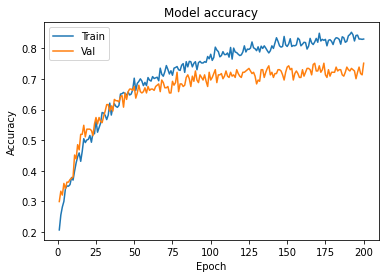

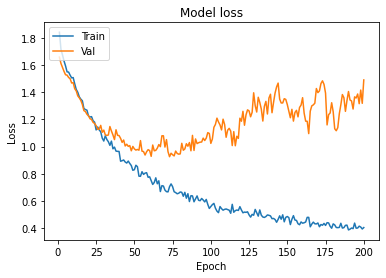

In [274]:
plot_learningCurve(history, 200)


In [275]:
score = model.evaluate(X_test, y_test, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

Test loss: 1.1979771852493286 / Test accuracy: 0.6959459185600281


 # modèle avec réglage des paramètres

###### changer le nombre de neurones et ajouter un  layer 

In [33]:
model = Sequential()
model.add(Conv2D(200, (2, 2), activation = 'relu', input_shape = X_train[0].shape))
model.add(Dense(100, activation = 'relu'))
model.add(Dropout(0.1))
#adding pooling layer
model.add(MaxPool2D(2,2))
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))
model.compile(optimizer=Adam(learning_rate = 0.001), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])


In [254]:
history = model.fit(X_train, y_train, epochs = 90, batch_size=100, validation_data= (X_test, y_test))
shuffle=True


Epoch 1/90
12/12 [==============================] - 3s 148ms/step - loss: 1.8044 - accuracy: 0.2272 - val_loss: 1.6901 - val_accuracy: 0.2939
Epoch 2/90
12/12 [==============================] - 1s 109ms/step - loss: 1.7037 - accuracy: 0.2492 - val_loss: 1.6553 - val_accuracy: 0.3074
Epoch 3/90
12/12 [==============================] - 1s 109ms/step - loss: 1.6316 - accuracy: 0.3032 - val_loss: 1.6133 - val_accuracy: 0.3412
Epoch 4/90
12/12 [==============================] - 1s 114ms/step - loss: 1.5960 - accuracy: 0.3100 - val_loss: 1.5982 - val_accuracy: 0.3209
Epoch 5/90
12/12 [==============================] - 1s 111ms/step - loss: 1.5606 - accuracy: 0.3564 - val_loss: 1.5478 - val_accuracy: 0.3750
Epoch 6/90
12/12 [==============================] - 1s 111ms/step - loss: 1.5348 - accuracy: 0.3514 - val_loss: 1.5226 - val_accuracy: 0.4054
Epoch 7/90
12/12 [==============================] - 1s 109ms/step - loss: 1.4788 - accuracy: 0.4062 - val_loss: 1.4753 - val_accuracy: 0.4122
Epoch 

12/12 [==============================] - 1s 105ms/step - loss: 0.6507 - accuracy: 0.7373 - val_loss: 0.8566 - val_accuracy: 0.6486
Epoch 59/90
12/12 [==============================] - 1s 105ms/step - loss: 0.6447 - accuracy: 0.7348 - val_loss: 0.8539 - val_accuracy: 0.6791
Epoch 60/90
12/12 [==============================] - 1s 109ms/step - loss: 0.6378 - accuracy: 0.7424 - val_loss: 0.9119 - val_accuracy: 0.6723
Epoch 61/90
12/12 [==============================] - 1s 111ms/step - loss: 0.6690 - accuracy: 0.7356 - val_loss: 0.8496 - val_accuracy: 0.6791
Epoch 62/90
12/12 [==============================] - 2s 128ms/step - loss: 0.5915 - accuracy: 0.7534 - val_loss: 0.8585 - val_accuracy: 0.6824
Epoch 63/90
12/12 [==============================] - 1s 112ms/step - loss: 0.6300 - accuracy: 0.7483 - val_loss: 0.8476 - val_accuracy: 0.6959
Epoch 64/90
12/12 [==============================] - 1s 116ms/step - loss: 0.6125 - accuracy: 0.7416 - val_loss: 0.8523 - val_accuracy: 0.6993
Epoch 65/90

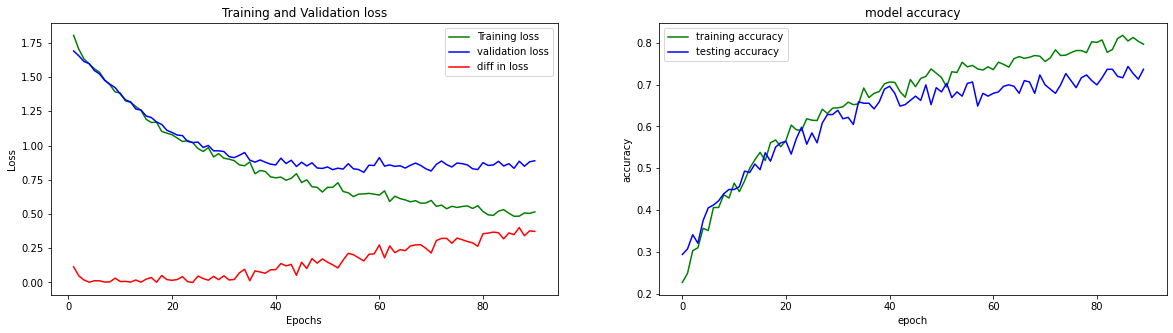

In [255]:
# Code to create graph for train vs validation error for different epochs
loss_train = history.history['loss']
loss_val = history.history['val_loss']
diff_in_loss=abs(np.subtract(loss_val,loss_train));
df = pd.DataFrame({'loss_train':loss_train, 'loss_val':loss_val, 'diff_in_loss':diff_in_loss})
# print(df.head(10))
fig = plt.figure(figsize=(20,5))
epochs = range(1,len(loss_train)+1)
plt.subplot(1, 2, 1)
plt.plot(epochs, loss_train, color='green', label='Training loss')
plt.plot(epochs, loss_val, color='blue', label='validation loss')
plt.plot(epochs, diff_in_loss, 'r', label='diff in loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], color='green')
plt.plot(history.history['val_accuracy'], color='blue')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training accuracy', 'testing accuracy'], loc='upper left')
plt.show()

In [256]:
history = model.fit(X_train, y_train, epochs = 200, batch_size=100, validation_data= (X_test, y_test))
shuffle=True


Epoch 1/200
12/12 [==============================] - 3s 159ms/step - loss: 0.5180 - accuracy: 0.7905 - val_loss: 0.8457 - val_accuracy: 0.7061
Epoch 2/200
12/12 [==============================] - 1s 114ms/step - loss: 0.4701 - accuracy: 0.8159 - val_loss: 0.9057 - val_accuracy: 0.7162
Epoch 3/200
12/12 [==============================] - 1s 125ms/step - loss: 0.4574 - accuracy: 0.8277 - val_loss: 0.8745 - val_accuracy: 0.7027
Epoch 4/200
12/12 [==============================] - 2s 131ms/step - loss: 0.5233 - accuracy: 0.7905 - val_loss: 0.8785 - val_accuracy: 0.7264
Epoch 5/200
12/12 [==============================] - 2s 129ms/step - loss: 0.4571 - accuracy: 0.8218 - val_loss: 0.9286 - val_accuracy: 0.7162
Epoch 6/200
12/12 [==============================] - 2s 151ms/step - loss: 0.4623 - accuracy: 0.8117 - val_loss: 0.8660 - val_accuracy: 0.7297
Epoch 7/200
12/12 [==============================] - 1s 124ms/step - loss: 0.4803 - accuracy: 0.7990 - val_loss: 0.8410 - val_accuracy: 0.7297

Epoch 58/200
12/12 [==============================] - 2s 145ms/step - loss: 0.3509 - accuracy: 0.8581 - val_loss: 0.9994 - val_accuracy: 0.7365
Epoch 59/200
12/12 [==============================] - 1s 107ms/step - loss: 0.3571 - accuracy: 0.8556 - val_loss: 1.0342 - val_accuracy: 0.7399
Epoch 60/200
12/12 [==============================] - 1s 115ms/step - loss: 0.3717 - accuracy: 0.8480 - val_loss: 1.0300 - val_accuracy: 0.7365
Epoch 61/200
12/12 [==============================] - 1s 114ms/step - loss: 0.3575 - accuracy: 0.8598 - val_loss: 1.0306 - val_accuracy: 0.7399
Epoch 62/200
12/12 [==============================] - 1s 126ms/step - loss: 0.3622 - accuracy: 0.8539 - val_loss: 1.0778 - val_accuracy: 0.7399
Epoch 63/200
12/12 [==============================] - 1s 120ms/step - loss: 0.3570 - accuracy: 0.8454 - val_loss: 0.9790 - val_accuracy: 0.7500
Epoch 64/200
12/12 [==============================] - 1s 124ms/step - loss: 0.3936 - accuracy: 0.8336 - val_loss: 1.0237 - val_accuracy:

Epoch 115/200
12/12 [==============================] - 1s 109ms/step - loss: 0.2956 - accuracy: 0.8919 - val_loss: 1.0293 - val_accuracy: 0.7399
Epoch 116/200
12/12 [==============================] - 1s 108ms/step - loss: 0.3102 - accuracy: 0.8716 - val_loss: 1.1307 - val_accuracy: 0.7534
Epoch 117/200
12/12 [==============================] - 1s 108ms/step - loss: 0.3246 - accuracy: 0.8682 - val_loss: 1.0375 - val_accuracy: 0.7466
Epoch 118/200
12/12 [==============================] - 1s 108ms/step - loss: 0.2985 - accuracy: 0.8851 - val_loss: 1.0786 - val_accuracy: 0.7466
Epoch 119/200
12/12 [==============================] - 1s 109ms/step - loss: 0.2890 - accuracy: 0.8860 - val_loss: 1.0148 - val_accuracy: 0.7703
Epoch 120/200
12/12 [==============================] - 1s 108ms/step - loss: 0.2938 - accuracy: 0.8877 - val_loss: 1.0169 - val_accuracy: 0.7466
Epoch 121/200
12/12 [==============================] - 1s 107ms/step - loss: 0.2755 - accuracy: 0.8970 - val_loss: 1.0951 - val_ac

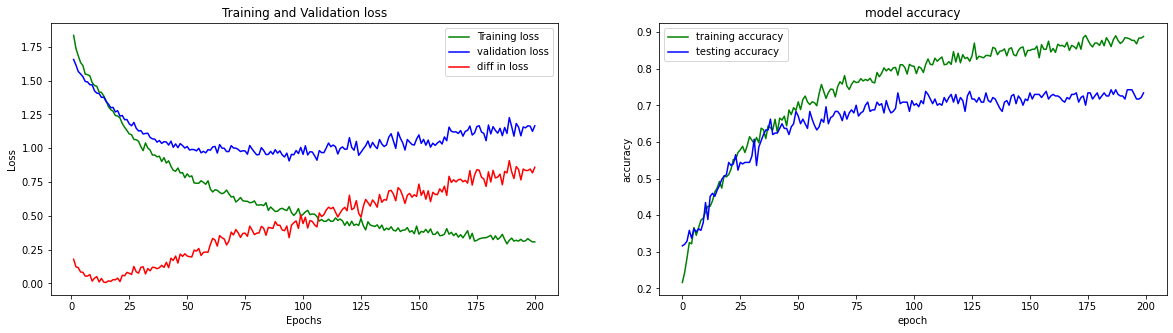

In [269]:
# Code to create graph for train vs validation error for different epochs
loss_train = history.history['loss']
loss_val = history.history['val_loss']
diff_in_loss=abs(np.subtract(loss_val,loss_train));
df = pd.DataFrame({'loss_train':loss_train, 'loss_val':loss_val, 'diff_in_loss':diff_in_loss})
# print(df.head(10))
fig = plt.figure(figsize=(20,5))
epochs = range(1,len(loss_train)+1)
plt.subplot(1, 2, 1)
plt.plot(epochs, loss_train, color='green', label='Training loss')
plt.plot(epochs, loss_val, color='blue', label='validation loss')
plt.plot(epochs, diff_in_loss, 'r', label='diff in loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], color='green')
plt.plot(history.history['val_accuracy'], color='blue')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training accuracy', 'testing accuracy'], loc='upper left')
plt.show()

In [270]:
score, acc = model.evaluate(X_test, y_test,verbose=2, batch_size= 256)
print('test accuracy:', acc)

2/2 - 0s - loss: 1.0972 - accuracy: 0.6892
test accuracy: 0.6891891956329346


######  fonction de modèle

In [23]:
def get_nn_simplemodel(n_inputs, n_outputs, optimizerinput='adam', n_neurons=200):
    # create model
    
    model = Sequential()
    model.add(Conv2D(100, (2, 2), activation = 'relu', input_shape =n_inputs, kernel_initializer='normal'))
    model.add(Dropout(0.1))
    #adding pooling layer
    model.add(MaxPool2D(2,2))
    model.add(Dense(n_neurons, activation = 'relu'))
    model.add(Dropout(0.5))
    model.add(Flatten())
    model.add(Dense(n_neurons, activation = 'relu'))
    model.add(Dropout(0.5))
    model.add(Dense(6, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer=optimizerinput, metrics=["accuracy"])
    return model

## réglage de l'optimiseur

In [295]:
# creer model
model = KerasClassifier(build_fn=get_nn_simplemodel, n_inputs=X_train[0].shape, n_outputs=6, epochs=200, batch_size=32, verbose=0)
#model = KerasClassifier(build_fn=create_model, verbose=0)

# definir les paramètres de recherche avec 
optimizer = ['RMSprop', 'Adam', 'Nadam']
param_grid = dict(optimizerinput=optimizer)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, y_train)

# résumé des résultats 
print(grid_result)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

GridSearchCV(cv=3,
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x0000023E4EBDC310>,
             n_jobs=-1,
             param_grid={'optimizerinput': ['RMSprop', 'Adam', 'Nadam']})
Best: 0.700182 using {'optimizerinput': 'Nadam'}
0.698492 (0.023139) with: {'optimizerinput': 'RMSprop'}
0.678220 (0.008643) with: {'optimizerinput': 'Adam'}
0.700182 (0.015818) with: {'optimizerinput': 'Nadam'}


#  réglage du nombre de neurones

In [24]:
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer, f1_score

# create model
model = KerasClassifier(build_fn=get_nn_simplemodel, n_inputs=X_train[0].shape, n_outputs=6, optimizerinput='Nadam', epochs=200, batch_size=32, verbose=0)

# define the grid search parameters
nn_neurons = [200, 300]
param_grid = dict(n_neurons=nn_neurons)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, y_train)

# summarize results
print(grid_result)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

GridSearchCV(cv=3,
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x00000289BC822970>,
             n_jobs=-1, param_grid={'n_neurons': [200, 300]})
Best: 0.706931 using {'n_neurons': 200}
0.706931 (0.006060) with: {'n_neurons': 200}
0.695110 (0.008029) with: {'n_neurons': 300}


# cross validation 

In [191]:
from sklearn.model_selection import KFold
import numpy as np

In [192]:
#add a new configuration value:

num_folds = 10

In [193]:
# Normalize data
#X_train = X_train / 255
#X_test = X_test / 255

# Define per-fold score containers <-- these are new
acc_per_fold = []
loss_per_fold = []

In [194]:
# Merge inputs and ys
inputs= np.concatenate((X_train, X_test), axis=0)
targets = np.concatenate((y_train, y_test), axis=0)

In [207]:
# Évaluation du modèle de validation k_fold
fold_no = 1
for train, test in kfold.split(inputs, targets):
    model
    # Compiler le modèle
    model.compile(loss = 'sparse_categorical_crossentropy',
                optimizer=Adam(learning_rate = 0.001),
                metrics=['accuracy'])

    # afficher
    print(f'Training for fold {fold_no} ...')
 
    # Fit data to model
    #history = model.fit(X_train, y_train, epochs = 50, batch_size=100, validation_split=0.2)
    history = model.fit(X_train, y_train, epochs = 60, validation_data= (X_test, y_test), verbose=1)
    #on remplace "test loss" print avec autre "fold loss".et incrémenter le nmbr fold_no:
    # générer generalization metrics
    scores = model.evaluate(inputs[test], targets[test], verbose=0)
    print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
    acc_per_fold.append(scores[1] * 100)
    loss_per_fold.append(scores[0])
    # incrémenter
    fold_no = fold_no + 1


Training for fold 1 ...
Epoch 1/60
37/37 [==============================] - 2s 34ms/step - loss: 0.5223 - accuracy: 0.8767 - val_loss: 1.0987 - val_accuracy: 0.7635
Epoch 2/60
37/37 [==============================] - 1s 24ms/step - loss: 0.4304 - accuracy: 0.8733 - val_loss: 1.0544 - val_accuracy: 0.7466
Epoch 3/60
37/37 [==============================] - 1s 24ms/step - loss: 0.4460 - accuracy: 0.8691 - val_loss: 0.9354 - val_accuracy: 0.7703
Epoch 4/60
37/37 [==============================] - 1s 24ms/step - loss: 0.3680 - accuracy: 0.8818 - val_loss: 0.9988 - val_accuracy: 0.7500
Epoch 5/60
37/37 [==============================] - 1s 25ms/step - loss: 0.3796 - accuracy: 0.8784 - val_loss: 0.9659 - val_accuracy: 0.7568
Epoch 6/60
37/37 [==============================] - 1s 24ms/step - loss: 0.3377 - accuracy: 0.8851 - val_loss: 0.9586 - val_accuracy: 0.7838
Epoch 7/60
37/37 [==============================] - 1s 25ms/step - loss: 0.3578 - accuracy: 0.8936 - val_loss: 0.9196 - val_accura

Epoch 55/60
37/37 [==============================] - 1s 23ms/step - loss: 0.2215 - accuracy: 0.9181 - val_loss: 0.9881 - val_accuracy: 0.7365
Epoch 56/60
37/37 [==============================] - 1s 26ms/step - loss: 0.1802 - accuracy: 0.9316 - val_loss: 1.0688 - val_accuracy: 0.7635
Epoch 57/60
37/37 [==============================] - 1s 27ms/step - loss: 0.1851 - accuracy: 0.9274 - val_loss: 1.0836 - val_accuracy: 0.7500
Epoch 58/60
37/37 [==============================] - 1s 26ms/step - loss: 0.2254 - accuracy: 0.9198 - val_loss: 1.0459 - val_accuracy: 0.7432
Epoch 59/60
37/37 [==============================] - 1s 27ms/step - loss: 0.1923 - accuracy: 0.9223 - val_loss: 1.0962 - val_accuracy: 0.7601
Epoch 60/60
37/37 [==============================] - 1s 28ms/step - loss: 0.1829 - accuracy: 0.9291 - val_loss: 1.0671 - val_accuracy: 0.7736
Score for fold 2: loss of 0.02744022198021412; accuracy of 100.0%
Training for fold 3 ...
Epoch 1/60
37/37 [==============================] - 2s 39m

Epoch 52/60
37/37 [==============================] - 1s 24ms/step - loss: 0.1692 - accuracy: 0.9383 - val_loss: 1.0827 - val_accuracy: 0.7736
Epoch 53/60
37/37 [==============================] - 1s 25ms/step - loss: 0.1897 - accuracy: 0.9189 - val_loss: 1.0787 - val_accuracy: 0.7669
Epoch 54/60
37/37 [==============================] - 1s 28ms/step - loss: 0.1845 - accuracy: 0.9383 - val_loss: 1.0941 - val_accuracy: 0.7770
Epoch 55/60
37/37 [==============================] - 1s 25ms/step - loss: 0.1928 - accuracy: 0.9333 - val_loss: 1.0932 - val_accuracy: 0.7669
Epoch 56/60
37/37 [==============================] - 1s 25ms/step - loss: 0.2003 - accuracy: 0.9231 - val_loss: 1.0672 - val_accuracy: 0.7939
Epoch 57/60
37/37 [==============================] - 1s 26ms/step - loss: 0.1723 - accuracy: 0.9426 - val_loss: 1.0912 - val_accuracy: 0.7804
Epoch 58/60
37/37 [==============================] - 1s 26ms/step - loss: 0.1858 - accuracy: 0.9375 - val_loss: 1.2435 - val_accuracy: 0.7466
Epoch 

Epoch 49/60
37/37 [==============================] - 1s 24ms/step - loss: 0.1781 - accuracy: 0.9324 - val_loss: 1.1682 - val_accuracy: 0.7601
Epoch 50/60
37/37 [==============================] - 1s 25ms/step - loss: 0.1909 - accuracy: 0.9257 - val_loss: 1.0968 - val_accuracy: 0.7669
Epoch 51/60
37/37 [==============================] - 1s 29ms/step - loss: 0.2087 - accuracy: 0.9265 - val_loss: 1.1662 - val_accuracy: 0.7736
Epoch 52/60
37/37 [==============================] - 1s 25ms/step - loss: 0.1978 - accuracy: 0.9198 - val_loss: 1.1831 - val_accuracy: 0.7770
Epoch 53/60
37/37 [==============================] - 1s 25ms/step - loss: 0.1374 - accuracy: 0.9426 - val_loss: 1.2021 - val_accuracy: 0.7703
Epoch 54/60
37/37 [==============================] - 1s 27ms/step - loss: 0.1883 - accuracy: 0.9333 - val_loss: 1.0786 - val_accuracy: 0.7534
Epoch 55/60
37/37 [==============================] - 1s 25ms/step - loss: 0.1604 - accuracy: 0.9383 - val_loss: 1.0963 - val_accuracy: 0.7838
Epoch 

Epoch 43/60
37/37 [==============================] - 2s 52ms/step - loss: 0.1531 - accuracy: 0.9400 - val_loss: 1.1823 - val_accuracy: 0.7770
Epoch 44/60
37/37 [==============================] - 1s 31ms/step - loss: 0.1450 - accuracy: 0.9434 - val_loss: 1.2843 - val_accuracy: 0.7736
Epoch 45/60
37/37 [==============================] - 1s 27ms/step - loss: 0.1666 - accuracy: 0.9375 - val_loss: 1.1767 - val_accuracy: 0.7703
Epoch 46/60
37/37 [==============================] - 1s 25ms/step - loss: 0.1678 - accuracy: 0.9485 - val_loss: 1.2479 - val_accuracy: 0.7399
Epoch 47/60
37/37 [==============================] - 1s 26ms/step - loss: 0.1730 - accuracy: 0.9358 - val_loss: 1.2181 - val_accuracy: 0.7601
Epoch 48/60
37/37 [==============================] - 1s 25ms/step - loss: 0.1756 - accuracy: 0.9443 - val_loss: 1.1602 - val_accuracy: 0.7635
Epoch 49/60
37/37 [==============================] - 1s 25ms/step - loss: 0.1612 - accuracy: 0.9426 - val_loss: 1.1007 - val_accuracy: 0.7601
Epoch 

Epoch 36/60
37/37 [==============================] - 1s 23ms/step - loss: 0.1395 - accuracy: 0.9527 - val_loss: 1.2251 - val_accuracy: 0.7669
Epoch 37/60
37/37 [==============================] - 1s 22ms/step - loss: 0.1721 - accuracy: 0.9552 - val_loss: 1.1871 - val_accuracy: 0.7669
Epoch 38/60
37/37 [==============================] - 1s 24ms/step - loss: 0.1644 - accuracy: 0.9476 - val_loss: 1.2153 - val_accuracy: 0.7635
Epoch 39/60
37/37 [==============================] - 1s 24ms/step - loss: 0.1582 - accuracy: 0.9409 - val_loss: 1.1331 - val_accuracy: 0.7635
Epoch 40/60
37/37 [==============================] - 1s 22ms/step - loss: 0.1513 - accuracy: 0.9459 - val_loss: 1.2166 - val_accuracy: 0.7703
Epoch 41/60
37/37 [==============================] - 1s 22ms/step - loss: 0.1219 - accuracy: 0.9535 - val_loss: 1.2349 - val_accuracy: 0.7804
Epoch 42/60
37/37 [==============================] - 1s 35ms/step - loss: 0.1405 - accuracy: 0.9434 - val_loss: 1.1219 - val_accuracy: 0.7703
Epoch 

37/37 [==============================] - 1s 25ms/step - loss: 0.1564 - accuracy: 0.9459 - val_loss: 1.2814 - val_accuracy: 0.7635
Epoch 34/60
37/37 [==============================] - 1s 24ms/step - loss: 0.1394 - accuracy: 0.9519 - val_loss: 1.2784 - val_accuracy: 0.7736
Epoch 35/60
37/37 [==============================] - 1s 24ms/step - loss: 0.1143 - accuracy: 0.9569 - val_loss: 1.2480 - val_accuracy: 0.7736
Epoch 36/60
37/37 [==============================] - 1s 24ms/step - loss: 0.1340 - accuracy: 0.9552 - val_loss: 1.2330 - val_accuracy: 0.7736
Epoch 37/60
37/37 [==============================] - 1s 30ms/step - loss: 0.1308 - accuracy: 0.9459 - val_loss: 1.2848 - val_accuracy: 0.7838
Epoch 38/60
37/37 [==============================] - 1s 30ms/step - loss: 0.1620 - accuracy: 0.9400 - val_loss: 1.2209 - val_accuracy: 0.7804
Epoch 39/60
37/37 [==============================] - 1s 38ms/step - loss: 0.1259 - accuracy: 0.9476 - val_loss: 1.2964 - val_accuracy: 0.7770
Epoch 40/60
37/37 

In [210]:
# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
    print('------------------------------------------------------------------------')
    print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')


------------------------------------------------------------------------
Score per fold
------------------------------------------------------------------------
> Fold 1 - Loss: 1.011602520942688 - Accuracy: 72.29729890823364%
------------------------------------------------------------------------
> Fold 2 - Loss: 0.07246782630681992 - Accuracy: 100.0%
------------------------------------------------------------------------
> Fold 3 - Loss: 0.06885936856269836 - Accuracy: 97.972971200943%
------------------------------------------------------------------------
> Fold 4 - Loss: 0.06960885971784592 - Accuracy: 97.972971200943%
------------------------------------------------------------------------
> Fold 5 - Loss: 0.04362855479121208 - Accuracy: 99.32432174682617%
------------------------------------------------------------------------
> Fold 6 - Loss: 0.03859845548868179 - Accuracy: 100.0%
------------------------------------------------------------------------
> Fold 7 - Loss: 0.0245

In [213]:
score = model.evaluate(X_test, y_test, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

Test loss: 1.4359596967697144 / Test accuracy: 0.7567567825317383


In [34]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=20)



In [35]:
history = model.fit(X_train, y_train, epochs = 200, batch_size=256, validation_data= (X_test, y_test), verbose=2, callbacks=[callback])


Epoch 1/200
5/5 - 4s - loss: 1.8811 - accuracy: 0.1900 - val_loss: 1.7678 - val_accuracy: 0.1588
Epoch 2/200
5/5 - 1s - loss: 1.7608 - accuracy: 0.2019 - val_loss: 1.7008 - val_accuracy: 0.2500
Epoch 3/200
5/5 - 1s - loss: 1.6938 - accuracy: 0.2677 - val_loss: 1.6705 - val_accuracy: 0.2703
Epoch 4/200
5/5 - 1s - loss: 1.6462 - accuracy: 0.2914 - val_loss: 1.6365 - val_accuracy: 0.2973
Epoch 5/200
5/5 - 1s - loss: 1.6244 - accuracy: 0.3024 - val_loss: 1.6128 - val_accuracy: 0.2736
Epoch 6/200
5/5 - 1s - loss: 1.6149 - accuracy: 0.3218 - val_loss: 1.6020 - val_accuracy: 0.3108
Epoch 7/200
5/5 - 1s - loss: 1.5637 - accuracy: 0.3328 - val_loss: 1.5831 - val_accuracy: 0.3514
Epoch 8/200
5/5 - 1s - loss: 1.5544 - accuracy: 0.3505 - val_loss: 1.5627 - val_accuracy: 0.3547
Epoch 9/200
5/5 - 1s - loss: 1.5379 - accuracy: 0.3615 - val_loss: 1.5403 - val_accuracy: 0.3480
Epoch 10/200
5/5 - 1s - loss: 1.5069 - accuracy: 0.3691 - val_loss: 1.5185 - val_accuracy: 0.3547
Epoch 11/200
5/5 - 1s - loss:

Epoch 85/200
5/5 - 1s - loss: 0.5487 - accuracy: 0.7931 - val_loss: 0.8856 - val_accuracy: 0.6993
Epoch 86/200
5/5 - 1s - loss: 0.5484 - accuracy: 0.7914 - val_loss: 0.8650 - val_accuracy: 0.6757
Epoch 87/200
5/5 - 1s - loss: 0.5284 - accuracy: 0.8015 - val_loss: 0.8496 - val_accuracy: 0.6926
Epoch 88/200
5/5 - 1s - loss: 0.4962 - accuracy: 0.8193 - val_loss: 0.8443 - val_accuracy: 0.7027
Epoch 89/200
5/5 - 1s - loss: 0.5274 - accuracy: 0.7829 - val_loss: 0.8590 - val_accuracy: 0.6959
Epoch 90/200
5/5 - 1s - loss: 0.5139 - accuracy: 0.8117 - val_loss: 0.8470 - val_accuracy: 0.7196
Epoch 91/200
5/5 - 1s - loss: 0.5352 - accuracy: 0.7821 - val_loss: 0.8708 - val_accuracy: 0.7128
Epoch 92/200
5/5 - 1s - loss: 0.5276 - accuracy: 0.7905 - val_loss: 0.8368 - val_accuracy: 0.7095
Epoch 93/200
5/5 - 1s - loss: 0.5031 - accuracy: 0.7973 - val_loss: 0.8477 - val_accuracy: 0.7061
Epoch 94/200
5/5 - 1s - loss: 0.5110 - accuracy: 0.8083 - val_loss: 0.8194 - val_accuracy: 0.7162
Epoch 95/200
5/5 - 1

Epoch 168/200
5/5 - 1s - loss: 0.3478 - accuracy: 0.8657 - val_loss: 0.9215 - val_accuracy: 0.7230
Epoch 169/200
5/5 - 1s - loss: 0.3593 - accuracy: 0.8438 - val_loss: 0.9136 - val_accuracy: 0.7128
Epoch 170/200
5/5 - 1s - loss: 0.3441 - accuracy: 0.8590 - val_loss: 0.9130 - val_accuracy: 0.7095
Epoch 171/200
5/5 - 1s - loss: 0.3466 - accuracy: 0.8623 - val_loss: 0.9261 - val_accuracy: 0.7027
Epoch 172/200
5/5 - 1s - loss: 0.3281 - accuracy: 0.8716 - val_loss: 0.9466 - val_accuracy: 0.7230
Epoch 173/200
5/5 - 1s - loss: 0.3266 - accuracy: 0.8742 - val_loss: 0.9501 - val_accuracy: 0.7264
Epoch 174/200
5/5 - 1s - loss: 0.3360 - accuracy: 0.8505 - val_loss: 0.9284 - val_accuracy: 0.7162
Epoch 175/200
5/5 - 1s - loss: 0.3195 - accuracy: 0.8725 - val_loss: 0.9495 - val_accuracy: 0.7128
Epoch 176/200
5/5 - 1s - loss: 0.3122 - accuracy: 0.8843 - val_loss: 0.9189 - val_accuracy: 0.7331
Epoch 177/200
5/5 - 1s - loss: 0.3214 - accuracy: 0.8742 - val_loss: 0.9528 - val_accuracy: 0.7095
Epoch 178/

In [21]:
score, acc = model.evaluate(X_test, y_test,verbose=2, batch_size= 256,validation_data= (X_test, y_test), verbos=1)
print('test accuracy:', acc)

NameError: name 'model' is not defined